DETAILS OF MEMBERS <br>
1.GILBERT KWAME QUAINOO- SB/FIN/20/0082 <br>
2.PIOUS DANSO- SB/FIN/20/0011 <br>
3.SINBAD AFRANE - SB/FIN/20/0100 <br>
4.FATI BUABENG - SB/FIN/20/0038 <br>
5.BRIGHT BENEDICT OWODOW - SB/FIN/20/0024 <br>
6.PATRICK ACKAH- SB/FIN/20/0043 <br>

* Genesis of every data analysis is to import any library necessary for the analysis

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

* The dataset is read in python using the pandas read_csv function <br>
* This is because the data comes or is stored in comma seperated format thus csv

In [2]:
ass= pd.read_csv('kpmgData.csv')

* The first five rows of the dataset is shown using head fuction

* The attributes  of the dataset are called out using colunms <br>
* This is to make make sure the column names are called correctly

In [3]:
ass.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,2,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,71.49,$53.62
1,2,3,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92
2,3,37,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82
3,4,88,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10
4,5,78,787,10/1/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48


* The info() is there to help us know the dataset we are working with
* It helps to know the data type each column comes with, either in the right format or not

In [4]:
ass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    20000 non-null  int64  
 1   product_id        20000 non-null  int64  
 2   customer_id       20000 non-null  int64  
 3   transaction_date  20000 non-null  object 
 4   online_order      19640 non-null  object 
 5   order_status      20000 non-null  object 
 6   brand             19803 non-null  object 
 7   product_line      19803 non-null  object 
 8   product_class     19803 non-null  object 
 9   product_size      19803 non-null  object 
 10  list_price        20000 non-null  float64
 11  standard_cost     19803 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


* After running the info() code:
* we realize that the transaction_date and the standard_cost are not in the right format to work with
* The following codes will help us to convert them into the right data type or format
  1. str.strip() fuction helps to do away with the dollar sign
  2. str.replace() fuction helps to replace the comma  among them with nothing thus to remove them
  3. later used pandas to convert standard_cost in to numeric thus float instead of object and transaction_date into  datetime instead of object
  4. The standard cost column has missig data and has been filled with the mean of the costs.Even though deleting it will affect  only  1.8% of the dataset filling it with mean of the cost will provide better insights and yield similar results.
  5. The mean is used because the cost column has no outliers that will affect the mean.

In [5]:
ass['standard_cost'] = ass['standard_cost'].str.strip('$,')

In [6]:
ass['standard_cost']= ass['standard_cost'].str.replace(',','')

In [7]:
ass['standard_cost'] = ass['standard_cost'].astype(float)

In [8]:
ass['transaction_date']= pd.to_datetime(ass['transaction_date'])

In [9]:
ass[['product_id','customer_id']] = ass[['product_id','customer_id']].astype(str)

In [10]:
#ass.dropna

In [11]:
#plt.scatter(x=ass['standard_cost'],y= ass['list_price'],color = 'g');

In [12]:
ass[['product_line','product_class','product_size','online_order','brand']
   ]=ass[['product_line','product_class','product_size','online_order','brand']].fillna('Uknown')

In [13]:
ass['standard_cost']= ass['standard_cost'].fillna(ass['standard_cost'].median())

In [14]:
ass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    20000 non-null  int64         
 1   product_id        20000 non-null  object        
 2   customer_id       20000 non-null  object        
 3   transaction_date  20000 non-null  datetime64[ns]
 4   online_order      20000 non-null  object        
 5   order_status      20000 non-null  object        
 6   brand             20000 non-null  object        
 7   product_line      20000 non-null  object        
 8   product_class     20000 non-null  object        
 9   product_size      20000 non-null  object        
 10  list_price        20000 non-null  float64       
 11  standard_cost     20000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 1.8+ MB


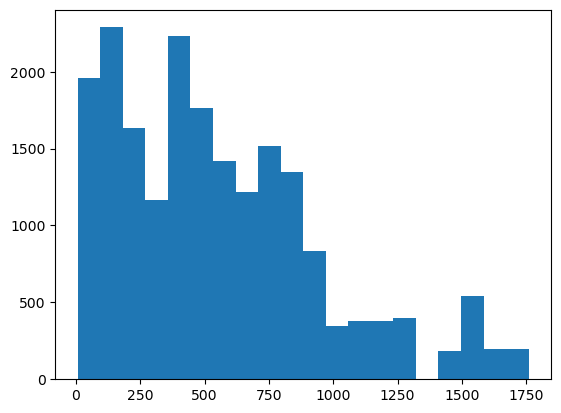

In [15]:
plt.hist(ass['standard_cost'],bins=20);

* THIS GRAPH TELLS THERE IS NO EXTREME VALUES AMONG THE COST FIGURES AND THEREFORE MADE THE MEAN AN APPROPRIATE WAY OF DEALING WITH THE MISSING VALUES IN THE COST COLUMN.

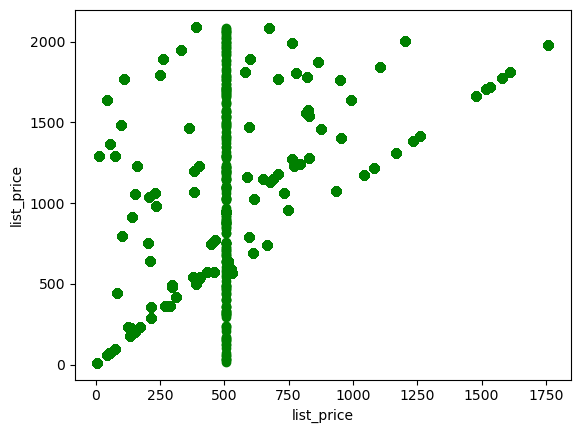

In [16]:
plt.xlabel('list_price')
plt.ylabel('list_price')
plt.scatter(x=ass['standard_cost'],y= ass['list_price'],color = 'g');

In [17]:
ass.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48


Profit column

In [18]:
ass['Profit'] = ass['list_price']-ass['standard_cost']

First requirement suggest how we should handle null values in the dataset thus to delete them <br>
so isnull is used to check and dropna is to delete null values

In [19]:
ass.isnull().sum()

transaction_id      0
product_id          0
customer_id         0
transaction_date    0
online_order        0
order_status        0
brand               0
product_line        0
product_class       0
product_size        0
list_price          0
standard_cost       0
Profit              0
dtype: int64

There no duplicates because of the unnique transaction IDs it is therefore not advisable to drop duplicates

In [20]:
ass.set_index('transaction_date',inplace= True)
ass.head()

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,Profit
transaction_date,,,,,,,,,,,,
2017-02-25,1,2,2950,False,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87
2017-05-21,2,3,3120,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55
2017-10-16,3,37,402,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61
2017-08-31,4,88,3135,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36
2017-10-01,5,78,787,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82


REQUIREMENT ONE
# This is the statiscal summary of the data

In [21]:
ass.describe()

,transaction_id,list_price,standard_cost,Profit
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,1107.829449,555.569552,552.259897
std,5773.647028,582.825242,403.979638,494.443236
min,1.000000,12.010000,7.210000,-491.500000
25%,5000.750000,575.270000,215.140000,133.780000
50%,10000.500000,1163.890000,507.580000,445.210000
75%,15000.250000,1635.300000,795.100000,830.240000
max,20000.000000,2091.470000,1759.850000,1702.550000


   REQUIREMENT 2
   # Brands and Product lines contributions to Sales

In [22]:
overall = pd.DataFrame(ass.groupby(['product_line'])['list_price'].sum().sort_values(ascending = False)
            ).reset_index()
overall['Sales Pencentage'] = round( overall['list_price'] / ass['list_price'].sum()*100,2)
overall

,product_line,list_price,Sales Pencentage
0,Standard,15634943.96,70.57
1,Road,4041528.14,18.24
2,Touring,1999338.92,9.02
3,Mountain,265870.72,1.20
4,Uknown,214907.24,0.97


In [23]:
overall_2 = pd.DataFrame(ass.groupby(['brand'])['list_price'].sum().sort_values(ascending = False)
            ).reset_index()
overall_2['Sales Pencentage'] = round( overall_2['list_price'] / ass['list_price'].sum()*100,2)
overall_2

,brand,list_price,Sales Pencentage
0,Solex,4496577.63,20.29
1,WeareA2B,4163083.61,18.79
2,Giant Bicycles,4091668.66,18.47
3,Trek Bicycles,3539512.36,15.97
4,OHM Cycles,2993420.35,13.51
5,Norco Bicycles,2657419.13,11.99
6,Uknown,214907.24,0.97


### Approved Product lines contributions

In [24]:
approved_transactions = ass.loc[ass['order_status'] == 'Approved']
line_con = pd.DataFrame(approved_transactions.groupby('product_line')['list_price'].sum().sort_values(ascending = False)
            ).reset_index()
line_con['Sales Pencentage'] = round(line_con ['list_price'] / approved_transactions['list_price'].sum()*100,2)
line_con

,product_line,list_price,Sales Pencentage
0,Standard,15488718.86,70.55
1,Road,4002503.36,18.23
2,Touring,1984354.25,9.04
3,Mountain,263918.82,1.20
4,Uknown,214701.40,0.98


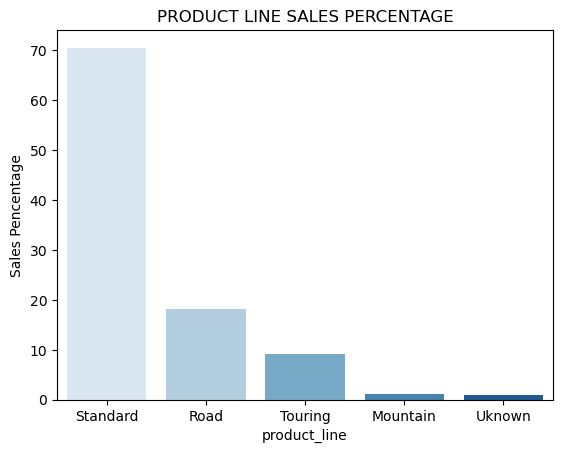

In [25]:
plt.title('PRODUCT LINE SALES PERCENTAGE')
sns.barplot(line_con,x='product_line',y= 'Sales Pencentage',palette='Blues');

### Approved Brands contributions

In [26]:
brand_con = pd.DataFrame(approved_transactions.groupby('brand')['list_price'].sum().sort_values(ascending = False)).reset_index()
brand_con['Sales Pencentage'] = round(brand_con ['list_price'] / approved_transactions['list_price'].sum()*100,2)
brand_con

,brand,list_price,Sales Pencentage
0,Solex,4446888.35,20.26
1,WeareA2B,4126372.83,18.80
2,Giant Bicycles,4055613.05,18.47
3,Trek Bicycles,3512223.81,16.00
4,OHM Cycles,2965459.80,13.51
5,Norco Bicycles,2632937.45,11.99
6,Uknown,214701.40,0.98


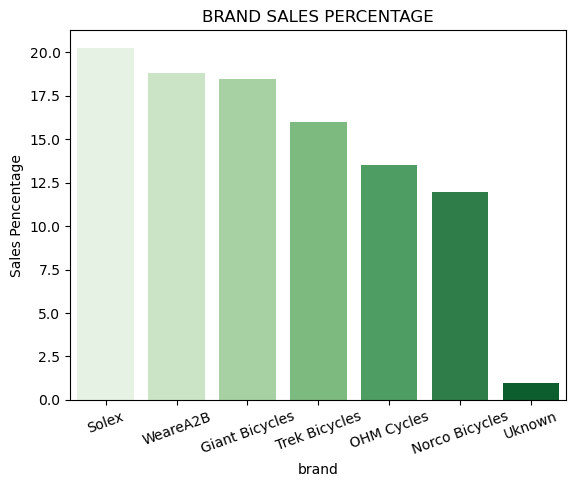

In [27]:
plt.title('BRAND SALES PERCENTAGE')
sns.barplot(brand_con,x='brand',y= 'Sales Pencentage',palette='Greens')
plt.xticks(rotation = 20);

# Brands and Product lines contributions to Profit

### Product lines contributions to Profit

In [28]:
pprofit= pd.DataFrame(round(approved_transactions.groupby('product_line')['Profit'].sum(),2)
            ).sort_values(by ='Profit' ,ascending= False).reset_index()
pprofit['Profit Pencentage'] = round(pprofit['Profit'] / approved_transactions['Profit'].sum()*100,2)
pprofit

,product_line,Profit,Profit Pencentage
0,Standard,8063637.59,73.66
1,Road,1388338.93,12.68
2,Touring,1339014.55,12.23
3,Uknown,115215.72,1.05
4,Mountain,40512.96,0.37


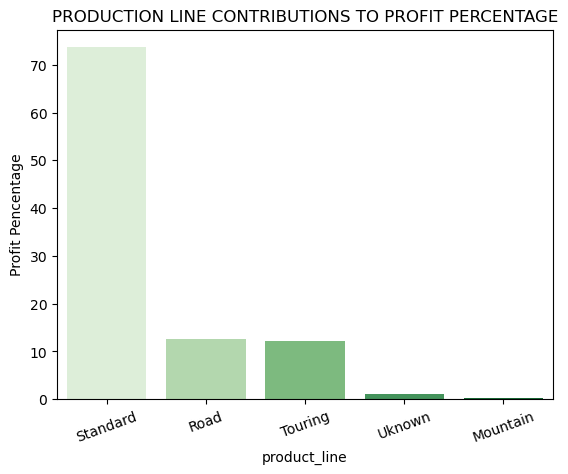

In [29]:
plt.title('PRODUCTION LINE CONTRIBUTIONS TO PROFIT PERCENTAGE')
sns.barplot(pprofit,x='product_line',y= 'Profit Pencentage',palette='Greens')
plt.xticks(rotation = 20);

### Brand contributions to Profit

In [30]:
bprofit = pd.DataFrame(round(approved_transactions.groupby('brand')['Profit'].sum(),2)
            ).sort_values(by='Profit', ascending=False).reset_index()
bprofit['Profit Pencentage'] = round(bprofit['Profit'] / approved_transactions['Profit'].sum()*100,2)
bprofit

,brand,Profit,Profit Pencentage
0,WeareA2B,2729902.83,24.94
1,Solex,2388554.84,21.82
2,Trek Bicycles,1822846.19,16.65
3,Giant Bicycles,1560130.48,14.25
4,OHM Cycles,1471181.17,13.44
5,Norco Bicycles,858888.52,7.85
6,Uknown,115215.72,1.05


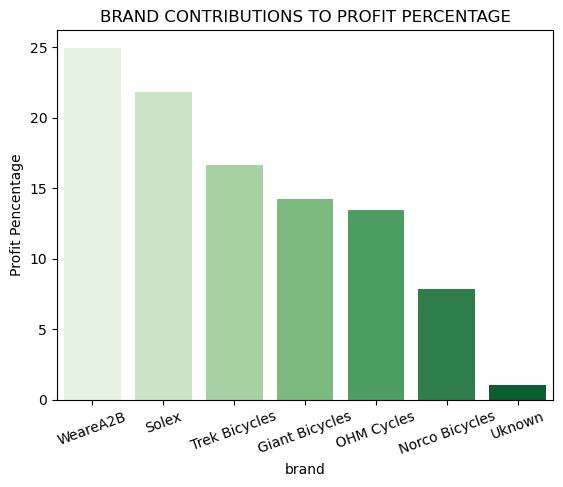

In [31]:
plt.title('BRAND CONTRIBUTIONS TO PROFIT PERCENTAGE')
sns.barplot(bprofit,x='brand',y= 'Profit Pencentage',palette='Greens')
plt.xticks(rotation = 20);

REQUIREMENT 3
# CANCELLATION BASED ON PRODUCT CLASS

In [32]:
cancelled_tra = ass.loc[ass['order_status'] == 'Cancelled']

In [33]:
can_pro = pd.DataFrame(cancelled_tra.groupby('product_class')['brand'].count().sort_values(ascending = False)
                       ).reset_index()
can_pro

,product_class,brand
0,medium,125
1,high,35
2,low,18
3,Uknown,1


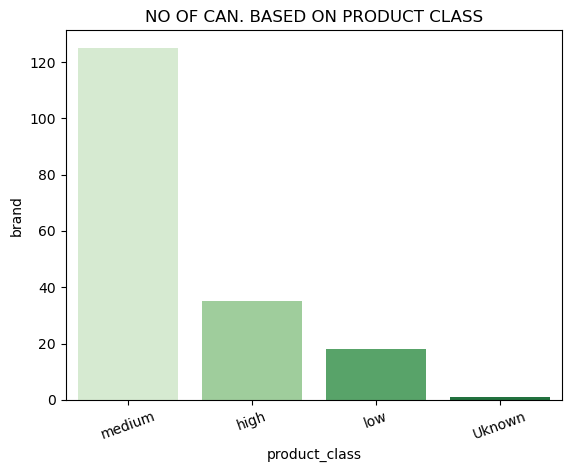

In [34]:
plt.title('NO OF CAN. BASED ON PRODUCT CLASS')
sns.barplot(can_pro,x='product_class',y= 'brand',palette='Greens')
plt.xticks(rotation = 20);

In [35]:
psales = pd.DataFrame(cancelled_tra.groupby('product_class')['list_price'].sum().sort_values(ascending = False)
                     ).reset_index()
psales

,product_class,list_price
0,medium,147299.70
1,high,38143.74
2,low,16743.01
3,Uknown,205.84


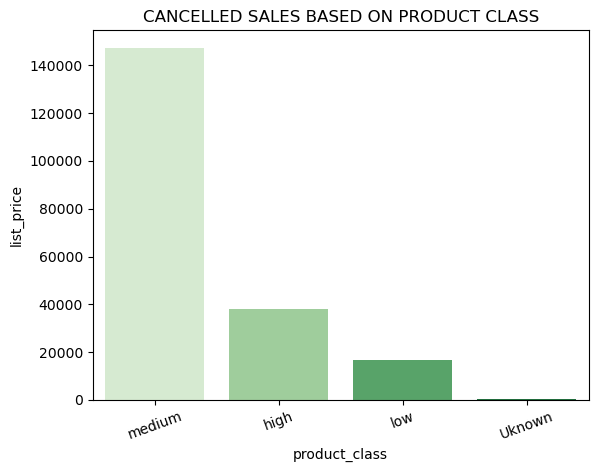

In [36]:
plt.title('CANCELLED SALES BASED ON PRODUCT CLASS')
sns.barplot(psales,x='product_class',y= 'list_price',palette='Greens')
plt.xticks(rotation = 20);

REQUIREMENT 4
# Based On customer ID cancellation Rate

In [37]:
ass.columns

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost', 'Profit'],
      dtype='object')

In [38]:
pd.DataFrame(cancelled_tra.groupby('customer_id')
             ['order_status',].count().sort_values(by ='order_status', ascending = False)).head(6) 

,order_status
customer_id,
1186,2
2852,2
2916,2
2073,2
1726,2
2979,1


In [39]:
cust_1= pd.DataFrame(cancelled_tra.groupby('customer_id')[['order_status','list_price','Profit']
                                                 ].sum().sort_values(by ='order_status', ascending = False)).head(5).reset_index()
cust_1

,customer_id,order_status,list_price,Profit
0,1186,CancelledCancelled,2013.43,1067.58
1,2852,CancelledCancelled,3318.54,1550.01
2,2916,CancelledCancelled,3281.05,938.41
3,2073,CancelledCancelled,1754.27,615.42
4,1726,CancelledCancelled,1783.70,581.06


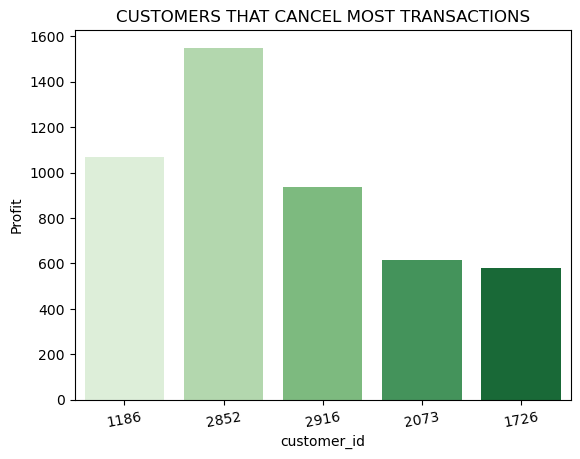

In [40]:
plt.title('CUSTOMERS THAT CANCEL MOST TRANSACTIONS')
sns.barplot(cust_1,x='customer_id',y= 'Profit',palette='Greens')
plt.xticks(rotation = 10);

In [41]:
IDs = pd.DataFrame(cust_1[['list_price','Profit']].sum())
IDs

,0
list_price,12150.99
Profit,4752.48


 From this, we can conclude that five customers cancelled two transactions at most and that influence sales by reducing it by $12150.99 
<br>  and profit by 4752.48

REQUIREMENT 5
# The total profit lost due to order cancellations and brands contributing more to this loss

### The total profit lost due to order cancellations is $10632648.86

In [42]:
loss = ass['Profit'].sum()-cancelled_tra['Profit'].sum()

In [43]:
cancelled_tra['Profit'].sum()/ass['Profit'].sum()*100

0.8915928034121849

### Respective Brands profit loss due to Cancellation

In [44]:
lprofit = pd.DataFrame(cancelled_tra.groupby('brand')['Profit'].sum().sort_values(ascending = False)).reset_index()
lprofit['loss Pencentage'] = round(lprofit['Profit'] / cancelled_tra['Profit'].sum()*100,2)
lprofit

,brand,Profit,loss Pencentage
0,Solex,25296.76,25.69
1,WeareA2B,23992.34,24.36
2,Trek Bicycles,15128.01,15.36
3,Giant Bicycles,13709.90,13.92
4,OHM Cycles,11857.67,12.04
5,Norco Bicycles,8795.25,8.93
6,Uknown,-301.74,-0.31


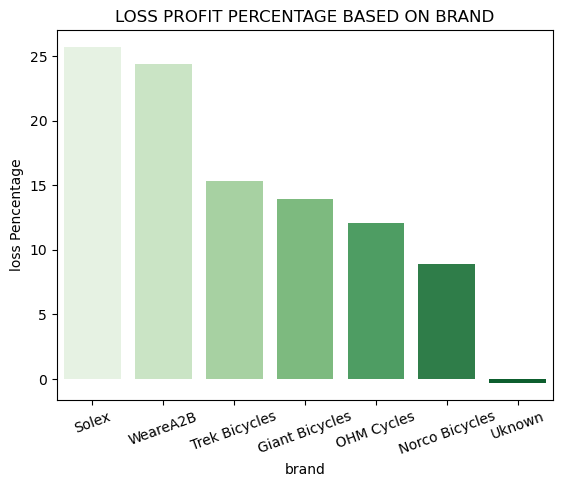

In [45]:
plt.title('LOSS PROFIT PERCENTAGE BASED ON BRAND')
sns.barplot(lprofit,x='brand',y= 'loss Pencentage',palette='Greens')
plt.xticks(rotation = 20);

REQUIREMET 6
# marketing initiatives to the company to boost online sales

In [46]:
online = pd.DataFrame(ass.groupby('online_order')['brand'].count()).reset_index()
online

,online_order,brand
0,False,9811
1,True,9829
2,Uknown,360


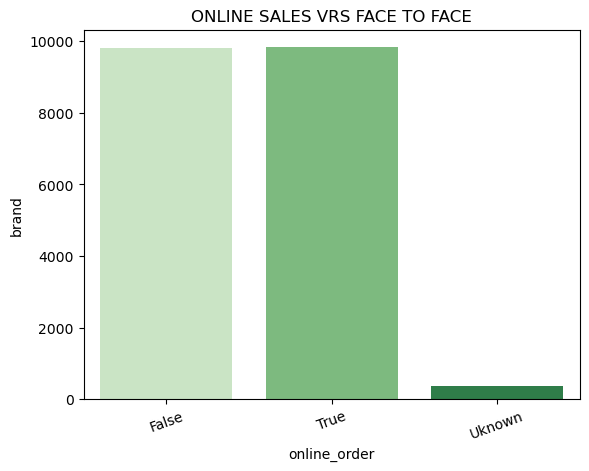

In [47]:
plt.title('ONLINE SALES VRS FACE TO FACE')
sns.barplot(online,x='online_order',y= 'brand',palette='Greens')
plt.xticks(rotation = 20);

# Product line with High cancellation Rate

In [48]:
pcans_rate = pd.DataFrame(cancelled_tra.groupby(['product_line'])['order_status'].count()).reset_index()
pcans_rate

,product_line,order_status
0,Mountain,3
1,Road,38
2,Standard,128
3,Touring,9
4,Uknown,1


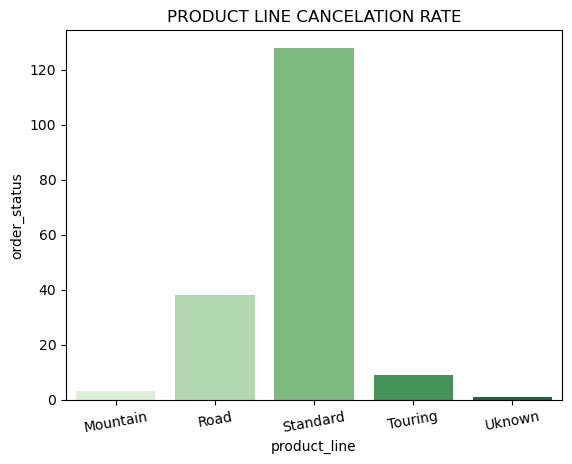

In [49]:
plt.title('PRODUCT LINE CANCELATION RATE')
sns.barplot(pcans_rate,x='product_line',y= 'order_status',palette='Greens')
plt.xticks(rotation = 10);

In [50]:
barh = pd.DataFrame(ass.groupby(['product_class','order_status'])['order_status'].count())
barh

order_status
product_class order_status              
Uknown        Approved               196
              Cancelled                1
high          Approved              2978
              Cancelled               35
low           Approved              2946
              Cancelled               18
medium        Approved             13701
              Cancelled              125

## How does the order status (approved or cancelled) affect overall sales and profit? 

In [51]:
cancelled_tra['list_price'].sum()/ass['list_price'].sum()*100

0.9134632148598897

In [52]:
approved_transactions['list_price'].sum()/ass['list_price'].sum()*100

99.08653678514011

In [53]:
cancelled_tra['Profit'].sum()/ass['Profit'].sum()*100

0.8915928034121849

In [54]:
approved_transactions['Profit'].sum()/ass['Profit'].sum()*100

99.10840719658782

In [55]:
heat= pd.DataFrame(ass.groupby(['brand','product_size',])['order_status'].count())
heat

order_status
brand          product_size              
Giant Bicycles large                  949
               medium                1776
               small                  587
Norco Bicycles large                  410
               medium                1736
               small                  764
OHM Cycles     large                  195
               medium                2648
               small                  200
Solex          large                 1091
               medium                2977
               small                  185
Trek Bicycles  large                  901
               medium                1542
               small                  547
Uknown         Uknown                 197
WeareA2B       large                  430
               medium                2311
               small                  554

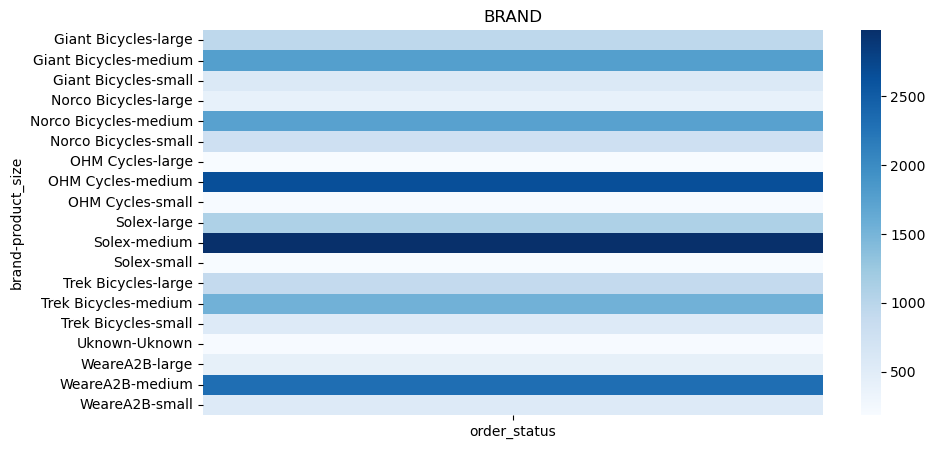

In [56]:
plt.figure(figsize=(10,5))
plt.title('BRAND')
sns.heatmap(heat,cmap='Blues');

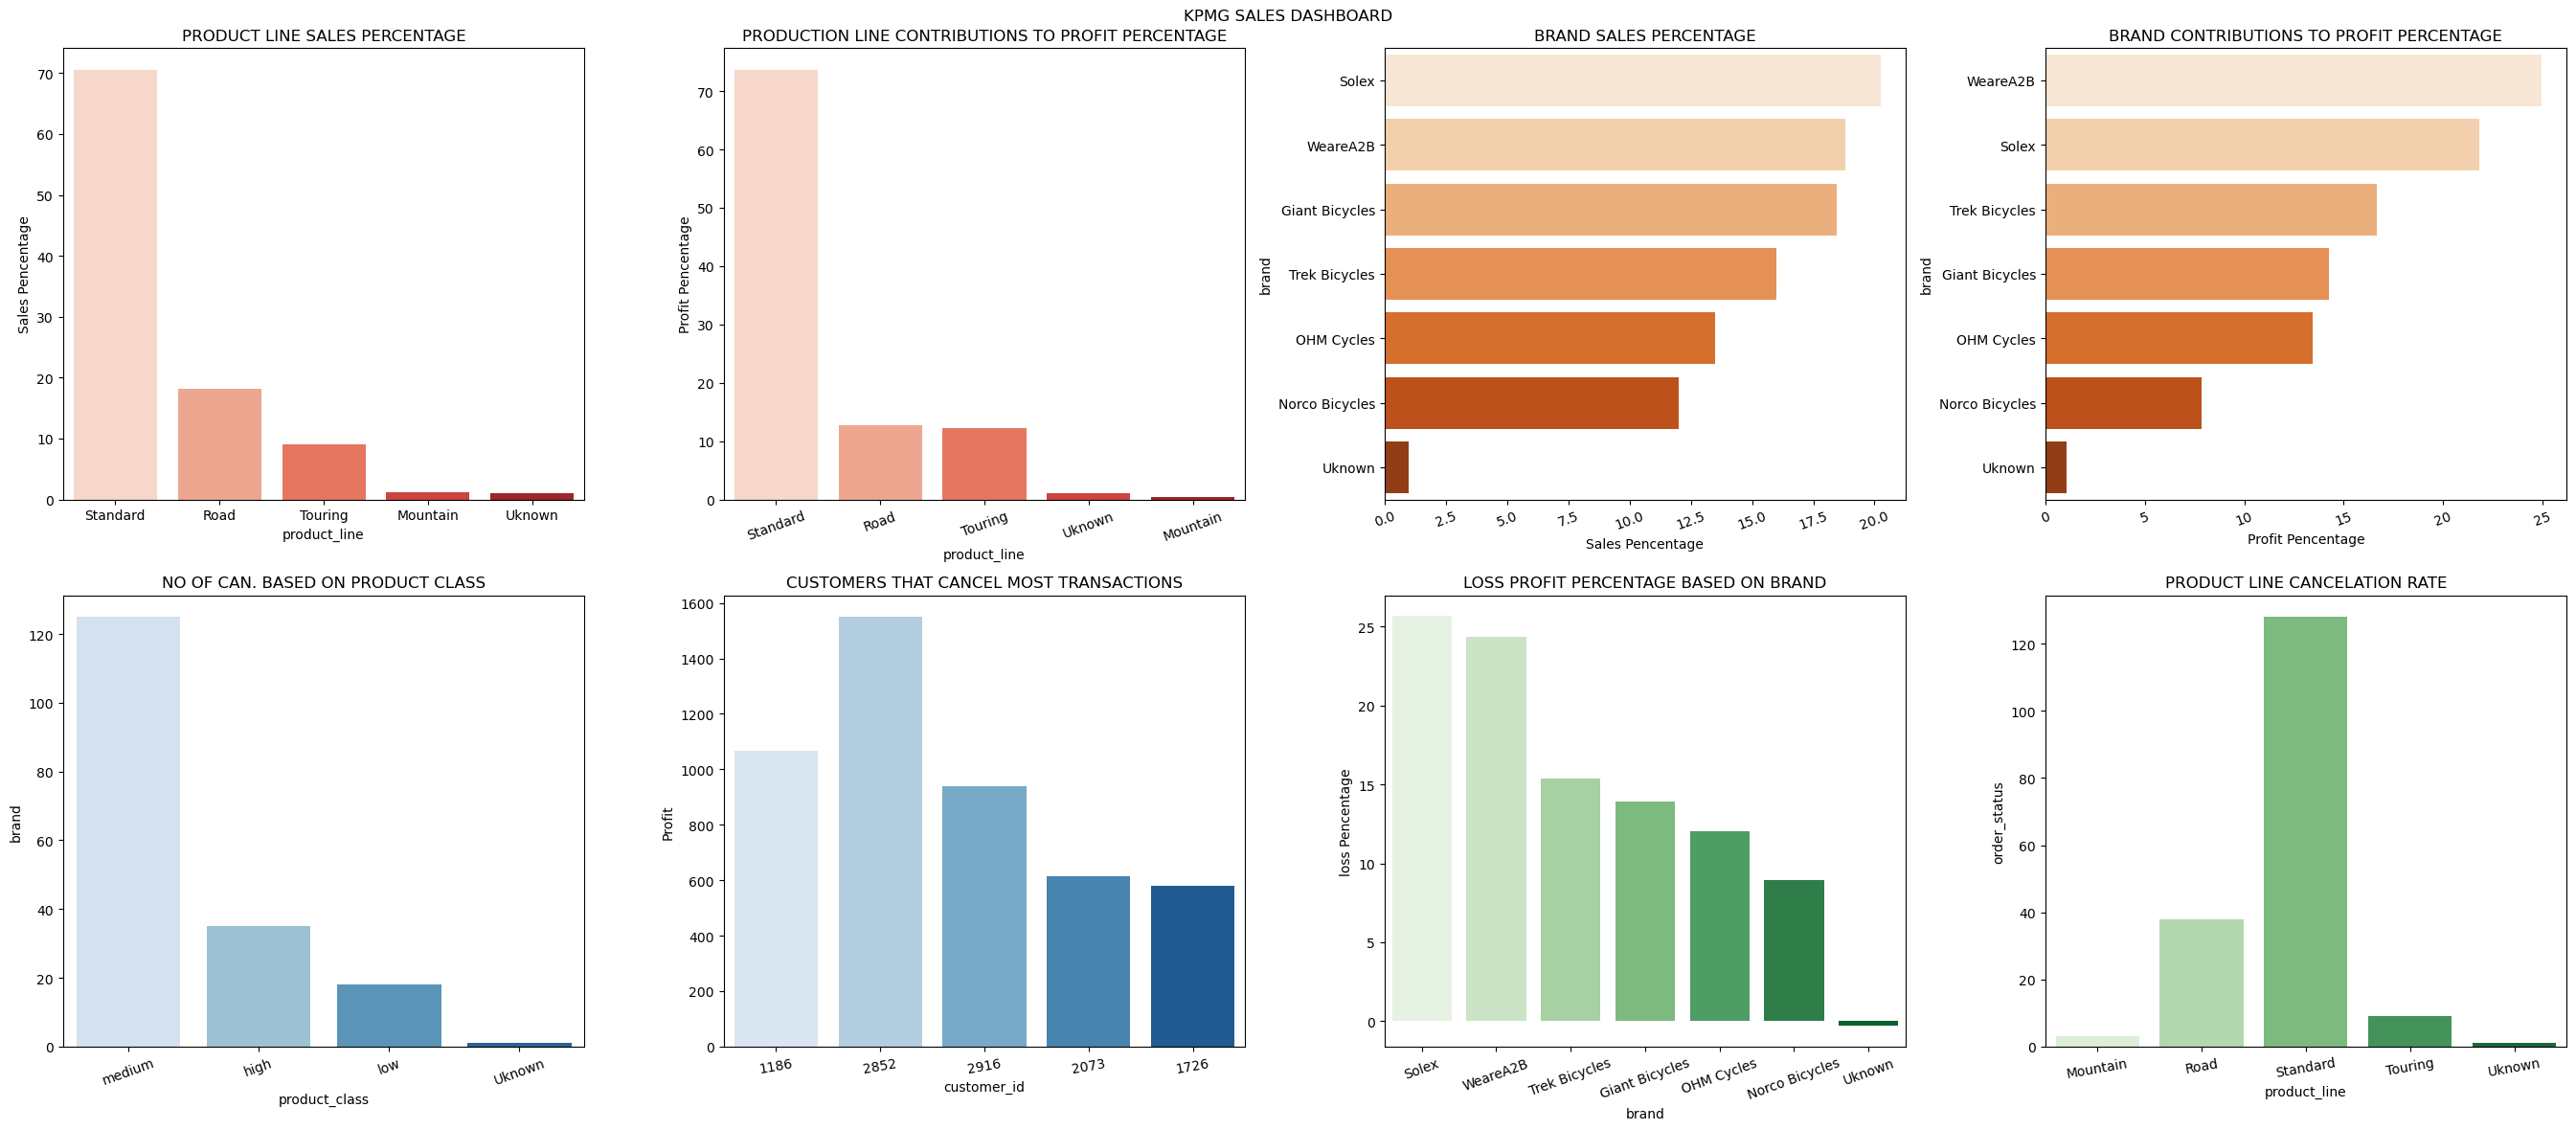

In [57]:
plt.subplots(2,4,figsize= (27,12))

plt.subplot(2,4,1)
plt.title('PRODUCT LINE SALES PERCENTAGE')
sns.barplot(line_con,x='product_line',y= 'Sales Pencentage',palette='Reds')

plt.subplot(2,4,2)
plt.title('PRODUCTION LINE CONTRIBUTIONS TO PROFIT PERCENTAGE')
sns.barplot(pprofit,x='product_line',y= 'Profit Pencentage',palette='Reds')
plt.xticks(rotation = 20)

plt.subplot(2,4,3)
plt.title('BRAND SALES PERCENTAGE')
sns.barplot(brand_con,y='brand',x= 'Sales Pencentage',palette='Oranges',orient = 'h')
plt.xticks(rotation = 20)

plt.subplot(2,4,4)
plt.title('BRAND CONTRIBUTIONS TO PROFIT PERCENTAGE')
sns.barplot(bprofit,y='brand',x= 'Profit Pencentage',palette='Oranges',orient = 'h')
plt.xticks(rotation = 20)

plt.subplot(2,4,5)
plt.title('NO OF CAN. BASED ON PRODUCT CLASS')
sns.barplot(can_pro,x='product_class',y= 'brand',palette='Blues')
plt.xticks(rotation = 20)

plt.subplot(2,4,6)
plt.title('CUSTOMERS THAT CANCEL MOST TRANSACTIONS')
sns.barplot(cust_1,x='customer_id',y= 'Profit',palette='Blues')
plt.xticks(rotation = 10)

plt.subplot(2,4,7)
plt.title('LOSS PROFIT PERCENTAGE BASED ON BRAND')
sns.barplot(lprofit,x='brand',y= 'loss Pencentage',palette='Greens')
plt.xticks(rotation = 20)

plt.subplot(2,4,8)
plt.title('PRODUCT LINE CANCELATION RATE')
sns.barplot(pcans_rate,x='product_line',y= 'order_status',palette='Greens')
plt.xticks(rotation = 10)

plt.suptitle('KPMG SALES DASHBOARD')
plt.tight_layout()
plt.savefig('KPMGF.png');